In [50]:
import pandas as pd
import quandl as Q
import math,datetime
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing, svm
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import pickle

In [2]:
df= Q.get("WIKI/GOOGL")

In [3]:
df=df[["Adj. Open","Adj. High","Adj. Low","Adj. Close","Adj. Volume"]]
df["HL_Pct"] = (df["Adj. High"] - df["Adj. Low"]) * 100/df["Adj. Low"]
df["Pct_change"] = (df["Adj. Close"] - df["Adj. Open"]) * 100/df["Adj. Open"]

In [10]:
df = df[["HL_Pct","Pct_change","Adj. Volume","Adj. Close"]]
forecast_col = "Adj. Close"
df.fillna(-99,inplace=True)
forecast = int(math.ceil(0.01*len(df)))
forecast

34

In [20]:
df["label_col"] = df[forecast_col].shift(-forecast)
#print(df)
x=np.array(df.drop(["label_col"],1))
x = x[:-forecast]
x_lately = x[-forecast:]
df.dropna(inplace=True)
y = np.array(df["label_col"])
#feature_cols = ["HL_Pct","Pct_change","Adj. Volume"]
y

array([ 69.63997192,  69.0782379 ,  67.83941377, ..., 792.45      ,
       808.01      , 807.77      ])

In [24]:
#x= df["HL_Pct","Pct_change","Adj. Volume"]
#y =df["label_col"]
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size = 0.2)
print(x_train.shape,y_train.shape)


(2466, 4) (2466,)


In [51]:
clf =  LinearRegression(n_jobs=-1)

clf.fit(x,y)
with open("linearregression.pickle","wb") as f:
    pickle.dump(clf,f)

In [52]:
pickle_in = open("linearregression.pickle","rb")
clf=pickle.load(pickle_in)

In [53]:
acc = clf.score(x_test,y_test)
acc 

0.9685183386031597

In [29]:
clf2 =  svm.SVR()

clf2.fit(x_train,y_train)
acc = clf2.score(x_test,y_test)
acc 

c:\users\ros\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-0.12160791572371575

In [30]:
forecast_value = clf.predict(x_lately)
forecast_value

array([816.26841415, 808.14407721, 810.23349531, 806.53378734,
       809.06764894, 807.38529022, 809.4957051 , 806.73340174,
       819.57093771, 814.8893462 , 818.2304379 , 810.17377411,
       810.80260754, 812.91752041, 826.35669992, 833.08414775,
       827.41116836, 830.14167436, 841.47018477, 833.37341581,
       827.34429413, 822.0569823 , 822.45069238, 814.57514844,
       810.18926452, 792.35808815, 787.81046592, 786.41075471,
       807.62343572, 817.13872191, 809.72899688, 780.16795465,
       776.75704801, 756.13261517])

In [43]:
last_date=df.iloc[-1].name
unix = last_date.timestamp()
next_unix = unix + 86400
df["forecastLM"] = np.nan
print(df.tail())
for i in forecast_value:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date]= [np.nan for _ in range(len(df.columns)-1)] + [i]
    
print(df.tail())

                     HL_Pct  Pct_change  Adj. Volume  Adj. Close  label_col  \
Date                                                                          
2016-12-14 01:00:00     NaN         NaN          NaN         NaN        NaN   
2016-12-15 01:00:00     NaN         NaN          NaN         NaN        NaN   
2016-12-16 01:00:00     NaN         NaN          NaN         NaN        NaN   
2016-12-17 01:00:00     NaN         NaN          NaN         NaN        NaN   
2016-12-18 01:00:00     NaN         NaN          NaN         NaN        NaN   

                     forecastLM  
Date                             
2016-12-14 01:00:00         NaN  
2016-12-15 01:00:00         NaN  
2016-12-16 01:00:00         NaN  
2016-12-17 01:00:00         NaN  
2016-12-18 01:00:00         NaN  
                     HL_Pct  Pct_change  Adj. Volume  Adj. Close  label_col  \
Date                                                                          
2017-01-17 02:00:00     NaN         NaN          N

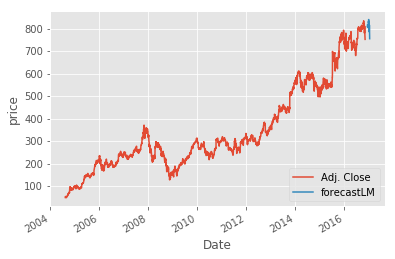

In [59]:
df["Adj. Close"].plot()
df["forecastLM"].plot()
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("price")
plt.show()